<a href="https://colab.research.google.com/github/IBILL98/Studying-Success-Factors-of-Kickstarter-Projects/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries and load data

In [ ]:
import numpy as np
from google.colab import files
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [ ]:
df = files.upload()

In [ ]:
df = pd.read_csv('ks-projects-201801.csv')


#about the data

In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15.0,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0,1283.0,19500.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [ ]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [ ]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

#cleaning and preparing the data

we will use only the "successful / failed " data

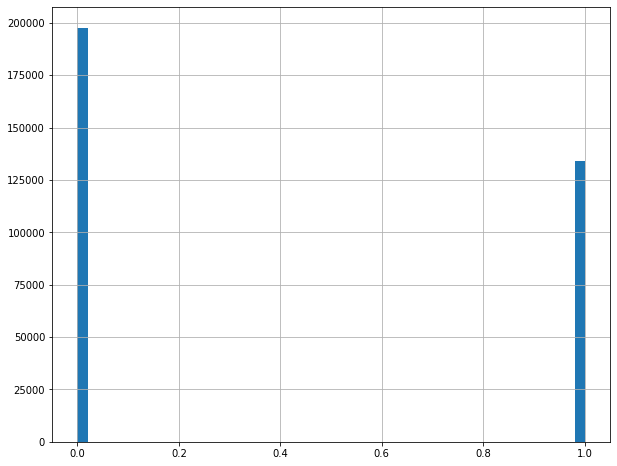

In [ ]:
fdf.iloc[: , 0].hist(bins=50, figsize=(10,8))
plt.show()

the number of failed projects is almost twice the number of the successful ones

In [ ]:
faidf = df[df['state'] == "failed"] 
succ = df[df['state'] == "successful"] 


merge them

In [ ]:
frames = [succ , faidf]
fdf = pd.concat(frames)

In [ ]:
fdf[['deadline' ,'launched']]

,deadline,launched
5,2016-04-01,2016-02-26 13:38:27
6,2014-12-21,2014-12-01 18:30:44
11,2013-04-08,2013-03-09 06:42:58
14,2017-05-03,2017-04-05 19:44:18
18,2012-08-17,2012-08-02 14:11:32
...,...,...
378654,2017-04-19,2017-03-20 22:08:22
378657,2011-07-19,2011-06-22 03:35:14
378658,2010-08-16,2010-07-01 19:40:30
378659,2016-02-13,2016-01-13 18:13:53


one column [period] instead of ['deadline' ,'launched'] 

In [ ]:
fdf['period'] = pd.to_datetime(fdf['deadline']) - pd.to_datetime(fdf['launched']).dt.normalize()
fdf['period'].head()

5    35 days
6    20 days
11   30 days
14   28 days
18   15 days
Name: period, dtype: timedelta64[ns]

In [ ]:
fdf['period'] = fdf['period'].dt.days


we get rid of redundant columns [['ID', 'name', 'category', 'currency', 'deadline', 'launched', 'pledged',  'usd pledged', ]


In [ ]:
fdf = fdf [['main_category' , 'backers', 'country' , 
         'usd_goal_real', 'period',
         'state']]

Categorical data - dummy values

In [ ]:
category_dummies = pd.get_dummies(fdf['main_category'])
country_dummy = pd.get_dummies(fdf['country'])


merge them

In [ ]:
fdf = pd.concat((fdf , category_dummies) , axis= 1)
fdf = pd.concat((fdf , country_dummy) , axis= 1)

In [ ]:
fdf

,main_category,backers,country,usd_goal_real,period,state,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
5,Food,224,US,50000.00,35,successful,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Food,16,US,1000.00,20,successful,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,Music,100,US,12500.00,30,successful,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14,Games,761,GB,6469.73,28,successful,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18,Music,7,US,250.00,15,successful,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,Food,4,US,6500.00,30,failed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
378657,Film & Video,5,US,1500.00,27,failed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
378658,Film & Video,1,US,15000.00,46,failed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
378659,Technology,6,US,15000.00,31,failed,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Categorical data - ordinal values

In [ ]:

ord_enc = OrdinalEncoder()
fdf['state'] = ord_enc.fit_transform(fdf[['state']])

merge and rearrnage columns

In [ ]:

fdf = fdf[['state',  'backers',  'usd_goal_real', 'period',
         'Art', 'Comics', 'Crafts', 'Dance', 'Design',
       'Fashion', 'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
       'Photography', 'Publishing', 'Technology', 'Theater', 'US' ,'AT', 'AU', 'BE',
       'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK', 'IE', 'IT', 'JP', 'LU',
       'MX', 'N,0"', 'NL', 'NO', 'NZ', 'SE', 'SG']]




In [ ]:
fdf.head()

,state,backers,usd_goal_real,period,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,US,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG
5,1.0,224,50000.00,35,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1.0,16,1000.00,20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1.0,100,12500.00,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,1.0,761,6469.73,28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
18,1.0,7,250.00,15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#split the data and train the models

<Figure size 432x288 with 0 Axes>

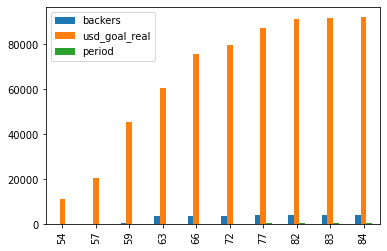

In [ ]:
fdf.cumsum
plt.figure()
(fdf.iloc[25:35 , 1:4].cumsum()).plot(kind="bar")


the Goal data are  bigger than other factors , thats why we need to scale the data

In [ ]:

fdf = shuffle(fdf)
X = fdf.iloc[: , 1:]
y = fdf.iloc[: , 0].values


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

split the data

In [ ]:
xtrain , xtest, ytrain ,ytest = train_test_split( X , y , test_size = 0.20 , random_state= 510)

In [ ]:
X[1]

array([-0.11744204, -0.03382546, -0.46839674,  3.45475584, -0.1752038 ,
       -0.15537144, -0.10435471, -0.28775811, -0.251797  , -0.45325728,
       -0.26688765, -0.30672609, -0.11255086, -0.40101734, -0.17346864,
       -0.34590988, -0.29798943, -0.17850367,  0.51868589, -0.03826769,
       -0.14266474, -0.03974085, -0.19682578, -0.04438076, -0.10231316,
       -0.05291225, -0.07536024, -0.08749839, -0.31218341, -0.03795031,
       -0.0454257 , -0.08481696, -0.00832765, -0.01311047, -0.06536314,
       -0.02517044, -0.08557097, -0.0419263 , -0.06209606, -0.06760494,
       -0.03702278])

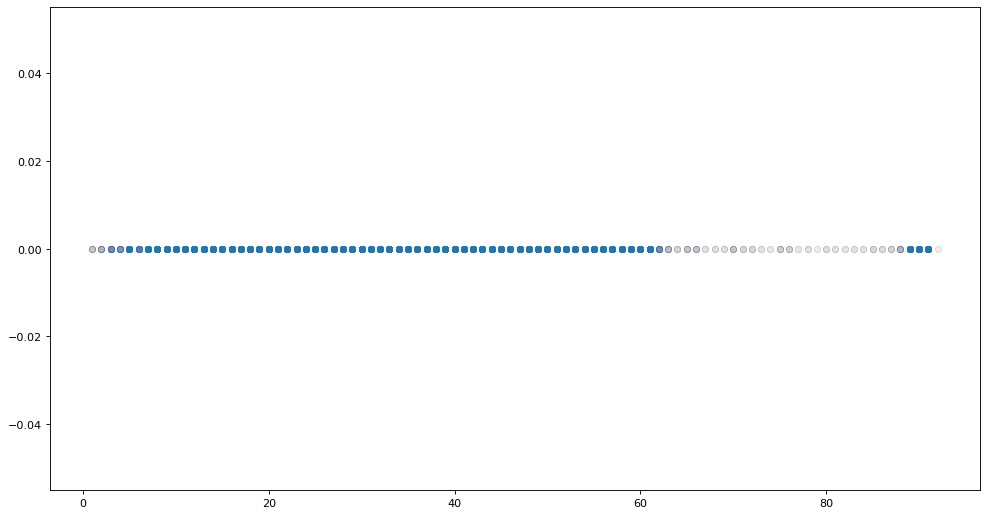

In [ ]:
plt.figure(figsize=(15, 8), dpi=80)

plt.scatter(y= fdf[fdf['state']== 1.0]['state'], x=fdf[fdf['state']== 1.0]['period'] , alpha = 0.002)


we notice that the successful ones have period in range of  10 to 30 days

#trainig the models

In [ ]:
from sklearn.linear_model import  SGDClassifier
sgd  = SGDClassifier( shuffle = True , random_state = 510)
sgd.fit(xtrain, ytrain)
accuracy_score(ytest , sgd.predict(xtest))

0.8315368960578879

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
accuracy_score(ytest , dtc.predict(xtest))

0.9034446370694204

In [ ]:
from sklearn.ensemble import  ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(xtrain, ytrain)
accuracy_score(ytest , etc.predict(xtest))

0.9109067611366548

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
rfc = RandomForestClassifier(random_state = 510 )
rfc.fit(xtrain , ytrain)
accuracy_score(ytest ,rfc.predict(xtest))

0.9221527097309112

so far random forrest gave the best results!!

In [ ]:
from sklearn.ensemble import VotingClassifier
votcl = VotingClassifier(estimators = [ ('etc' , sgd) , ('rfc', rfc) , ('dtc' , dtc) ] , voting = 'hard')
votcl.fit(xtrain, ytrain)


VotingClassifier(estimators=[('etc',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=510, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                            

In [ ]:
accuracy_score(ytest , votcl.predict(xtest))

0.9160774854903143


#tuning the hyperparameters

Stil  random forest the bette model , we need to tune the hyperparameters using GRIDSEARCHCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 12, 14, 16],
    'max_features': [2, 3 , 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)



> Indented block



In [ ]:
grid_search.fit(xtrain , ytrain)

grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 64.8min


In [ ]:
grid_search.best_params_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=510,
                       verbose=0, warm_start=False)

#final results

In [ ]:
from sklearn.metrics import confusion_matrix as conm
cf_matrix = conm(ytest , rfc.predict(xtest))
cf_matrix

array([[36689,  2707],
       [ 2457, 24482]])

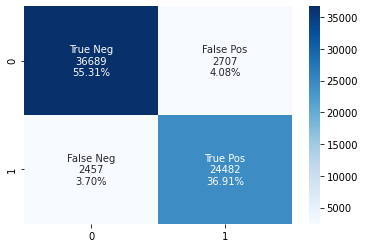

In [ ]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues' )

In [ ]:
np.round(rfc.feature_importances_ , 3)

array([0.705, 0.191, 0.055, 0.002, 0.002, 0.001, 0.001, 0.003, 0.002,
       0.003, 0.002, 0.003, 0.001, 0.006, 0.001, 0.002, 0.004, 0.004,
       0.002, 0.   , 0.001, 0.   , 0.001, 0.   , 0.001, 0.   , 0.   ,
       0.001, 0.002, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.001,
       0.001, 0.   , 0.   , 0.   , 0.   ])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


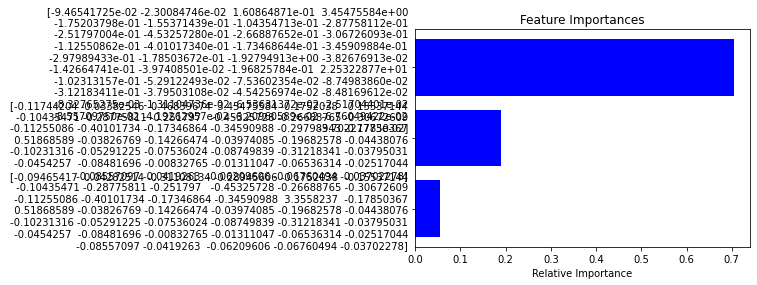

In [ ]:
features = X[:3]
importances = rfc.feature_importances_[0:3]
indices = np.argsort(importances)

plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()